In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.svm import SVC, SVR
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = {
 'fashion_item': ['Dress A', 'Dress B', 'Shirt A', 'Shirt B', 'Pants A', 'Pants B'],
 'description': ['Red dress with floral print', 'Blue dress with polka dots', 'White shirt with short sleeves', 
                 'Black shirt with long sleeves', 'Green pants with pockets', 'Beige pants with stripes'],
 'rating': [5, 4, 3, 2, 5, 4]
 }

df=pd.DataFrame(data)
print(df)

  fashion_item                     description  rating
0      Dress A     Red dress with floral print       5
1      Dress B      Blue dress with polka dots       4
2      Shirt A  White shirt with short sleeves       3
3      Shirt B   Black shirt with long sleeves       2
4      Pants A        Green pants with pockets       5
5      Pants B        Beige pants with stripes       4


In [5]:
X=df["description"]
y=df["rating"]

In [7]:
tfidf = TfidfVectorizer()
tfidf_X= tfidf.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_X, y, test_size=0.3, random_state=42)

In [11]:
scaler=StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [13]:
svr= SVR(kernel="linear", C=1.0)
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
svr_mse= mean_squared_error(y_test, svr_pred)
print(svr_mse)

1.4975162697227935


In [15]:
xgbr = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100)
xgbr.fit(X_train_scaled, y_train)
xgbr_pred=xgbr.predict(X_test_scaled)
xgbr_mse=mean_squared_error(y_test, xgbr_pred)
print(xgbr_mse)

2.4998934281571223


In [17]:
df["trendy"] = [1, 0, 1, 1, 0, 0]

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(tfidf_X, df["trendy"], test_size=0.3, random_state=42)

In [19]:
xgbc=xgb.XGBClassifier()
xgbc.fit(X_train_cls, y_train_cls)
xgbc_pred= xgbc.predict(X_test_cls)

In [25]:
accuracy = accuracy_score(y_test_cls, xgbc_pred)
print(accuracy)

0.5


In [29]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(tfidf_X.toarray())
labels=kmeans.labels_

C:\Users\hrmoh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
df["Cluster"]= labels
print("Kmeans clustering results")
print(df[["fashion_item", "Cluster"]])

Kmeans clustering results
  fashion_item  Cluster
0      Dress A        0
1      Dress B        0
2      Shirt A        1
3      Shirt B        1
4      Pants A        1
5      Pants B        1


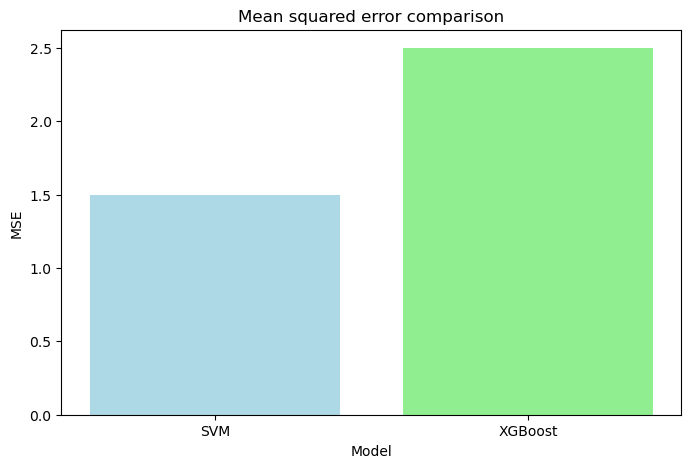

In [43]:
plt.figure(figsize=(8,5))
plt.bar(["SVM", "XGBoost"], [svr_mse, xgbr_mse], color=["lightblue", "lightgreen"])
plt.title("Mean squared error comparison")
plt.ylabel("MSE")
plt.xlabel("Model")
plt.show()

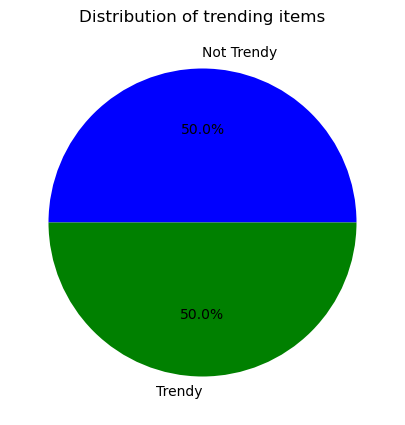

In [47]:
plt.figure(figsize=(8,5))
plt.pie(df["trendy"].value_counts(), labels=["Not Trendy", "Trendy"], autopct="%1.1f%%", colors=["blue", "green"])
plt.title("Distribution of trending items")
plt.show()

ValueError: '---' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

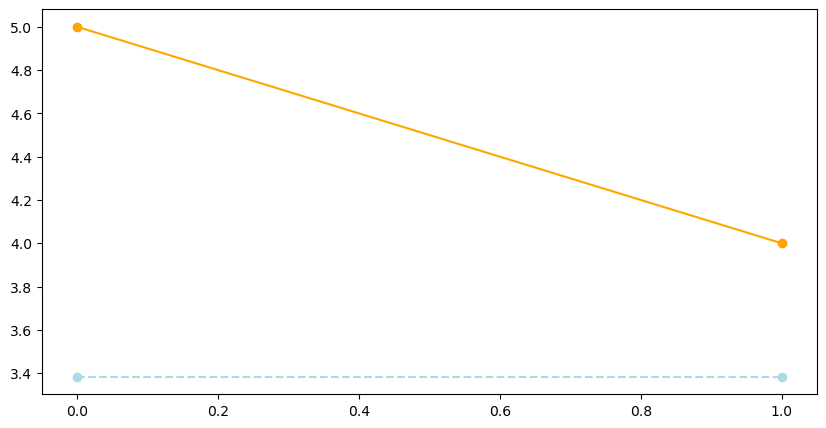

In [49]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Ratings", marker="o", linestyle="-", color="orange")
plt.plot(svr_pred, label="SVR Predictions", marker="o", linestyle="--", color="lightblue")
plt.plot(xgbr_pred, label="XGBoost predictions", marker="o", linestyle="---", color="light-green")
plt.title("Actual prediction vs predicted ratings")
plt.ylabel("Ratings")
pplt.xlabel("Fashion item index")
plt.legend()
plt.grid()
plt.show()